# Dataset showcase

In [1]:
from torchvision import transforms
from torch.utils.data import DataLoader
import pandas as pd
from image_utils import CustomImageDataset, display_n_sampled_images

In [2]:
class_mapping = {'Skyscraper': 1, 'Car': 2, 'Person': 3}

downloaded_annotations = pd.read_csv("downloaded_annotations.csv")

In [5]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip()
])

target_size = (64,64)

train_dataset = CustomImageDataset(image_dir="images/all", class_annotations=downloaded_annotations, class_mapping=class_mapping, 
                                   transform=transform, dataset_type="train", target_size=target_size)
validation_dataset = CustomImageDataset(image_dir="images/all", class_annotations=downloaded_annotations, class_mapping=class_mapping, 
                                        transform=None, dataset_type="validation", target_size=target_size)
test_dataset = CustomImageDataset(image_dir="images/all", class_annotations=downloaded_annotations,  class_mapping=class_mapping, 
                                  transform=None, dataset_type="test", target_size=target_size)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=1)

## Training data

[3382, 2068, 124, 4010, 1998]

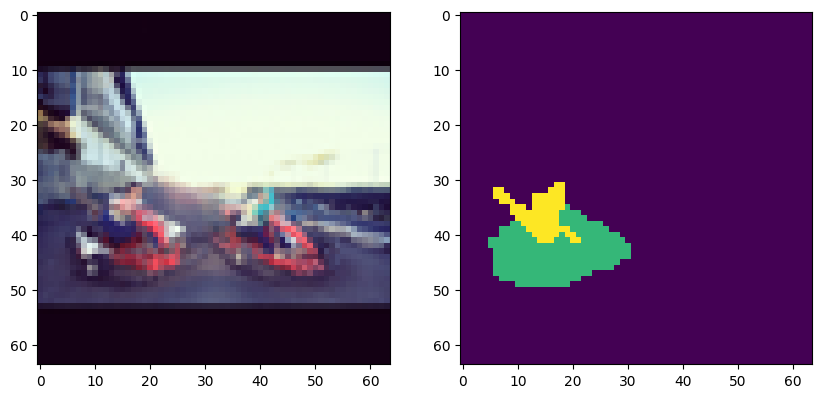

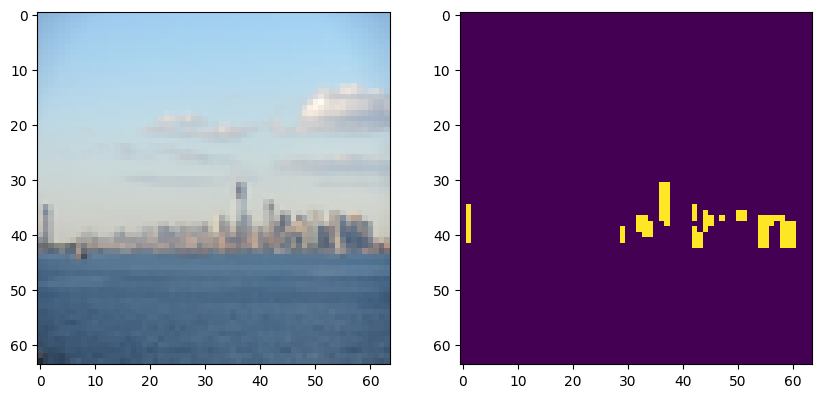

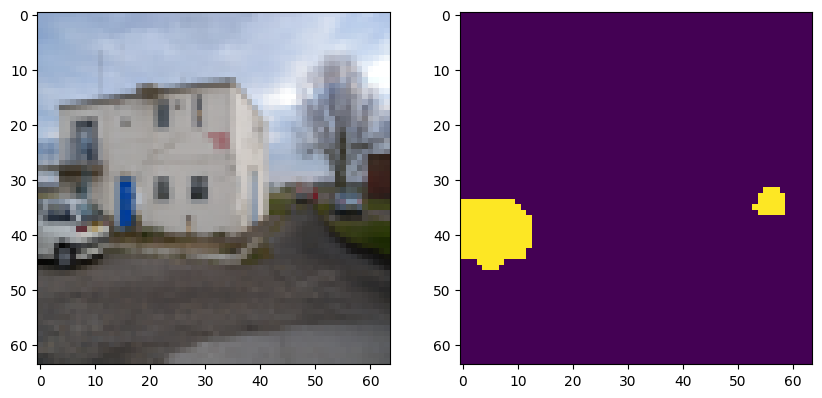

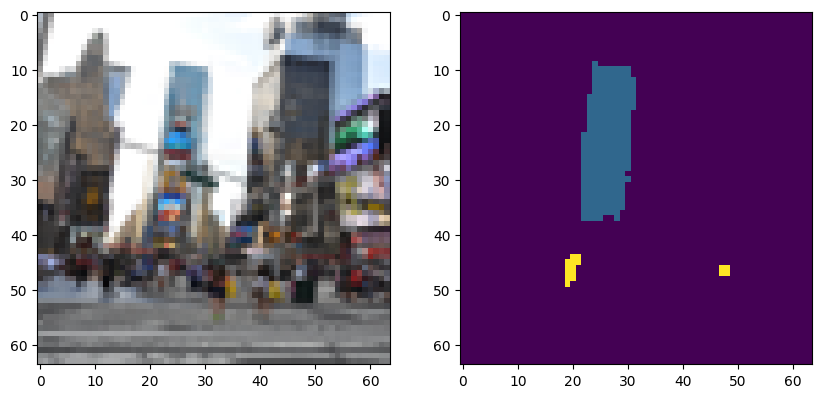

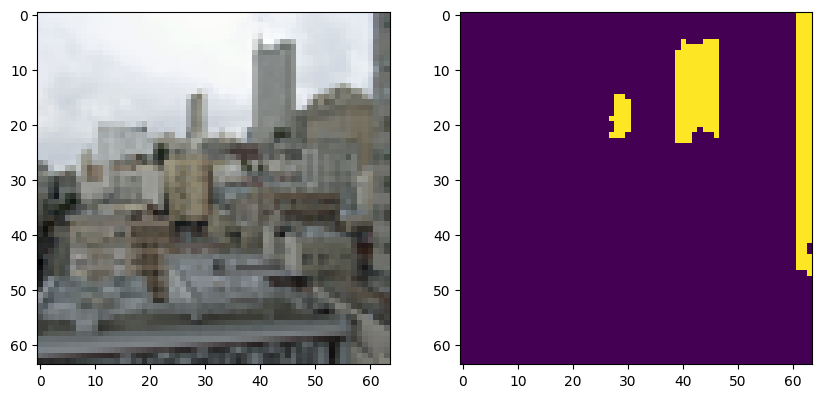

In [6]:
display_n_sampled_images(train_dataset, 5)

## Validation data

[507, 404, 482, 559, 343]

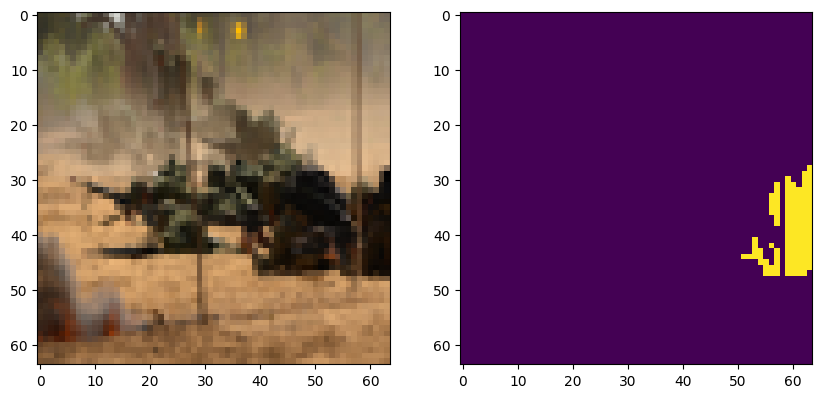

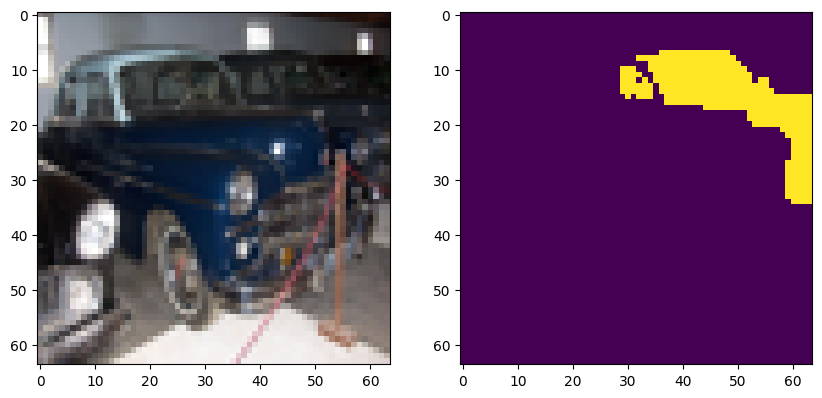

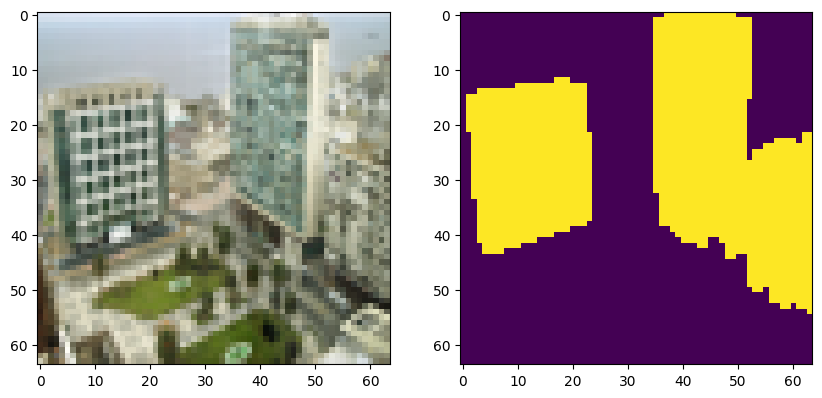

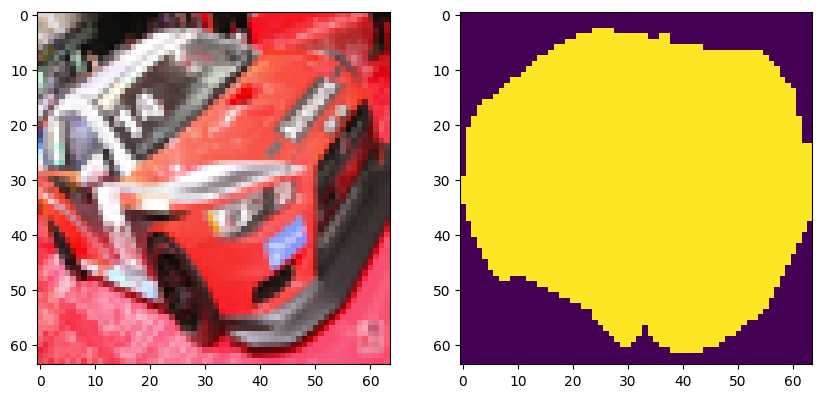

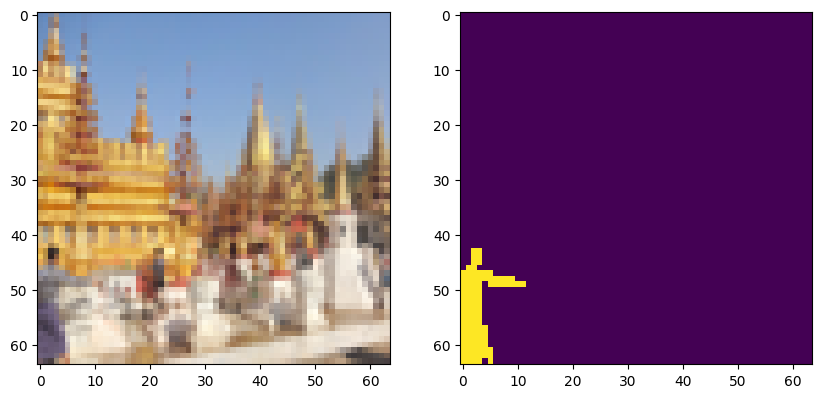

In [7]:
display_n_sampled_images(validation_dataset, 5)

## Testing data

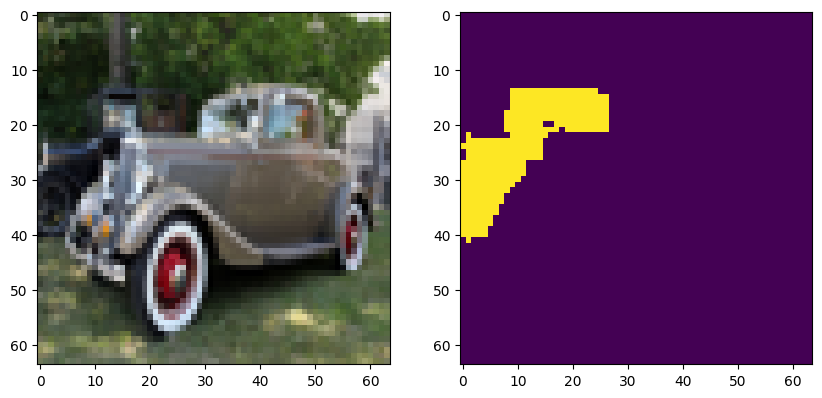

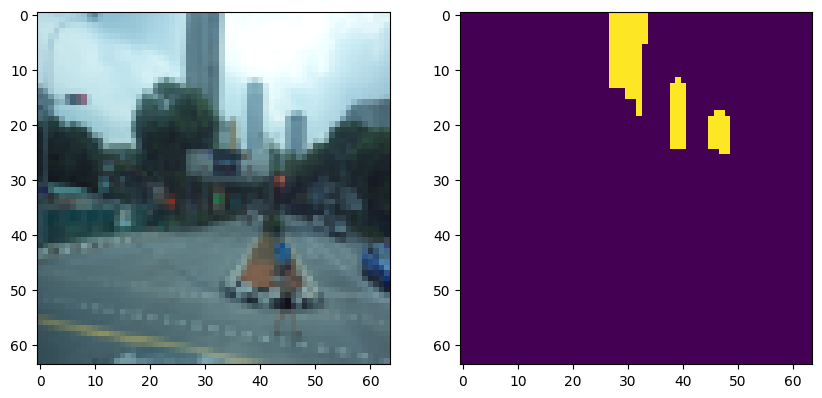

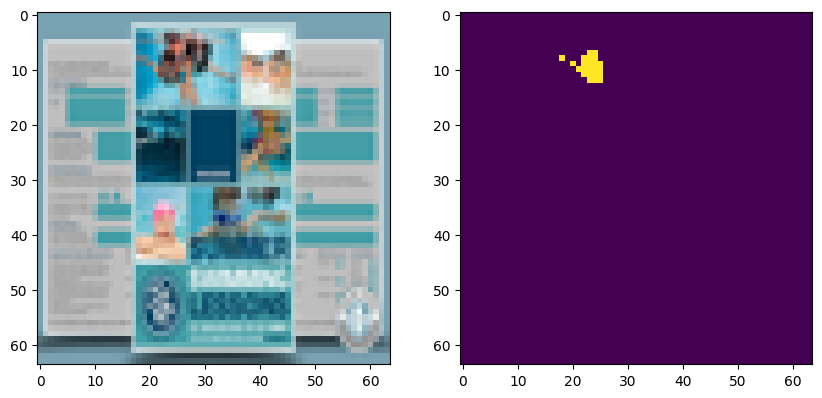

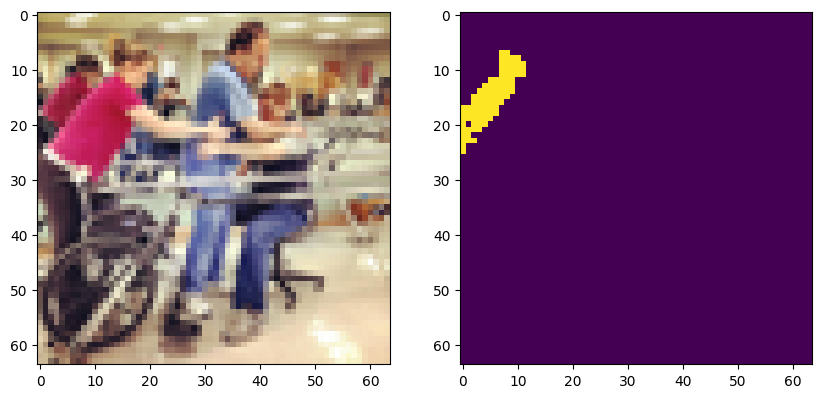

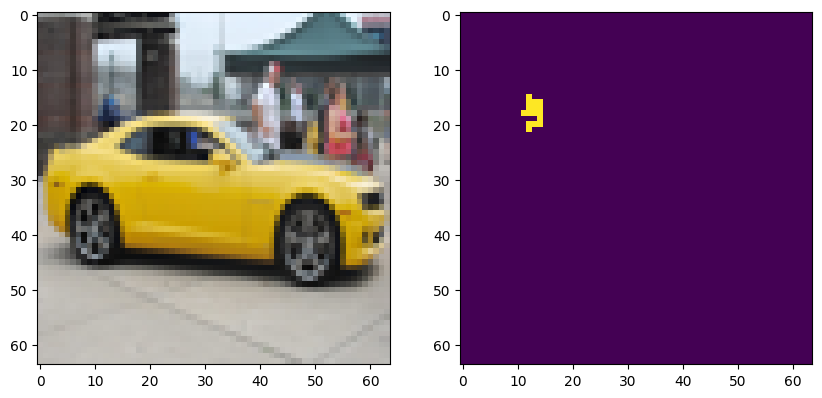

In [8]:
test_nrs = display_n_sampled_images(test_dataset, 5)

## Troubleshooting improper masks

In [9]:
test_nrs

[327, 1148, 1713, 876, 496]

In [16]:
im_id = test_dataset.image_ids[327]
downloaded_annotations[downloaded_annotations["ImageID"] == im_id]

,MaskPath,ImageID,LabelName,BoxID,BoxXMin,BoxXMax,BoxYMin,BoxYMax,PredictedIoU,Clicks,type,label_name,class,ImageID_first_character
16140,2e4169d29fd631e5_m0k4j_09d392d5.png,2e4169d29fd631e5,/m/0k4j,09d392d5,0.0,0.429204,0.212389,0.646018,0.0,NaN,test,/m/0k4j,Car,2


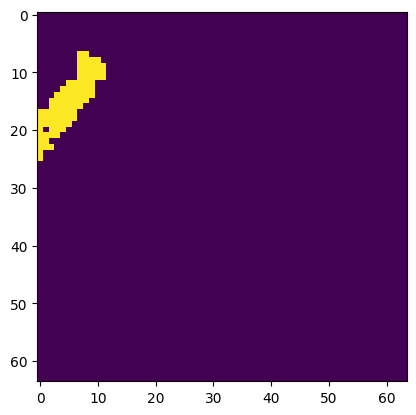

In [15]:
from image_utils import combine_all_masks, get_mask_dict_for_image_id
import matplotlib.pyplot as plt

mask_dict = get_mask_dict_for_image_id(im_id, downloaded_annotations)

test_mask = combine_all_masks(mask_dict, class_mapping, target_size = (64, 64))

plt.imshow(test_mask)